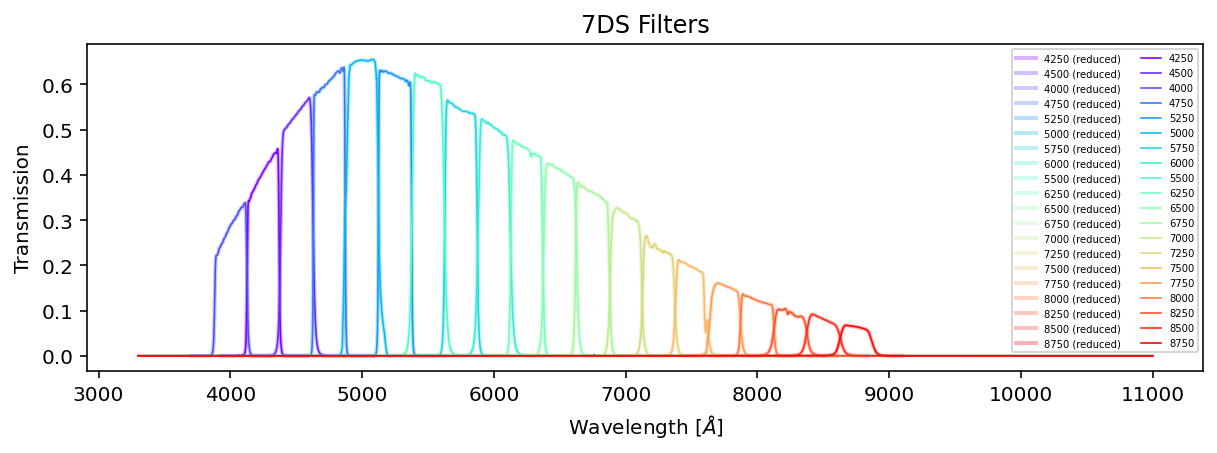

In [34]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from matplotlib import pyplot as plt
from astropy.table import Table
from pathlib import Path
import numpy as np
from eazy import filters

CWD = Path.cwd()
WD = CWD.parent

FIGUREDIR = WD / 'figures'
FIGUREDIR.mkdir(exist_ok=True)

FILTERDIR = WD / '7DT_filters_v2' 
filtpaths = list(FILTERDIR.glob('*.csv'))

colors = plt.cm.rainbow(np.linspace(0, 1, len(filtpaths)))

redfilts_all = filters.FilterFile(WD/'FILTER.RES+7DTreduced.res')
redfilts_ids = redfilts_all.search("7DT", verbose=False)
# redfilts = redfilts_all.filters[redfilts_ids]

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
for i, filtid in enumerate(redfilts_ids):
    filt = redfilts_all.filters[filtid]
    ax.plot(filt.wave, filt.throughput, c=colors[i], lw=2, alpha=0.3, label=filt.name[4:8]+' (reduced)')
for i, filtpath in enumerate(filtpaths):
    filt = Table.read(filtpath)
    ax.plot(filt['wavelength']*10, filt['transmission'], c=colors[i], lw=0.8, alpha=1, label=filtpath.stem[:4])
ax.set_xlabel(r'Wavelength [$\AA$]')
ax.set_ylabel('Transmission')
ax.set_title('7DS Filters')
ax.legend(ncol=2, fontsize=5)
fig.savefig(FIGUREDIR/'filter_7ds.png', dpi=300, bbox_inches='tight')

In [30]:
filt

col0,wavelength,transmission
int64,float64,float64
0,330.0,8.674427862905153e-09
1,330.2,1.2224558854941131e-08
2,330.4,1.1886947546160358e-08
3,330.6,2.1448974316258473e-09
4,330.8,7.453188839733447e-10
5,331.0,4.4349094015892594e-10
6,331.2,4.0542778354003627e-10
7,331.4,5.755724157871054e-10
8,331.6,1.477382755557211e-09
